 Rejection ABC against a simulated target
 TMP FILE copied from simabc.py
 DO NOT EDIT

In [1]:
import warnings
import sys, os
import copy
join = lambda *x: os.path.abspath(os.path.join(*x))
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import scipy.stats


import readtrack
import command
import stats
import pili
import parameters
import _fj
import fjanalysis
import twanalyse
import rtw
import sobol
import abcimplement
import twutils

import pili.publication as pub


In [2]:
plotting = False

In [3]:
# config
plt.rcParams.update({
    'text.usetex': False,
    'figure.figsize': (20,20),
    'axes.labelsize': 16
    })
notename = 'simabc'
verbose = False



In [4]:
simtarget = "/home/dan/usb_twitching/run/825bd8f/target/t0"
with command.chdir(simtarget):
    ltarget = stats.load()
    args = parameters.thisread()
_simobjective = ['lvel.mean', 'deviation.var', 'qhat.estimate', 'ahat.estimate', 'kmsd.mean',
    'double_ltrs.qhat.estimate', 'double_ltrs.ahat.estimate', 
    'quad_ltrs.qhat.estimate', 'quad_ltrs.ahat.estimate', 
    'cell_ltrs.qhat.estimate', 'cell_ltrs.ahat.estimate']
simref = {name : twutils.make_get(name)(ltarget) for name in _simobjective}
_interest = ['dwell_time', 'k_spawn', 'pilivar',  'anchor_angle_smoothing_fraction']
# print(parameters.describe(args, target=_interest))
simpar = {par : args.pget(par) for par in _interest}
simpar['anchor_angle_smoothing_fraction'] *= np.pi/2
simpar, simref

({'dwell_time': 1.0,
  'k_spawn': 5.0,
  'pilivar': 2.5,
  'anchor_angle_smoothing_fraction': 0.23561944901923448},
 {'lvel.mean': 0.06487301715702128,
  'deviation.var': 0.5678075484863769,
  'qhat.estimate': 0.4038269581893859,
  'ahat.estimate': 0.15627795468227001,
  'kmsd.mean': 1.8550550708266433,
  'double_ltrs.qhat.estimate': 0.4995342404397461,
  'double_ltrs.ahat.estimate': 0.07475371511977931,
  'quad_ltrs.qhat.estimate': 0.6018948169665832,
  'quad_ltrs.ahat.estimate': 0.044651163193733454,
  'cell_ltrs.qhat.estimate': 0.7647442208807746,
  'cell_ltrs.ahat.estimate': 0.027285357625329954})

In [5]:
sim4d = {}
sim4d["simdir"] = "/home/dan/usb_twitching/run/825bd8f/cluster/mc4d"
sim4d["objectives"] = ['lvel.mean', 'deviation.var', 'qhat.estimate', 'ahat.estimate', 'fanjin.top.ks_statistic', 'kmsd.mean',
    'double_ltrs.qhat.estimate', 'double_ltrs.ahat.estimate', 
    'quad_ltrs.qhat.estimate', 'quad_ltrs.ahat.estimate', 
    'cell_ltrs.qhat.estimate', 'cell_ltrs.ahat.estimate']
sim4d = abcimplement.load_problem_simulation(sim4d)
sim4d["problem"]


nan found in lvel.mean. filtering 1 samples
nan found in deviation.var. filtering 1 samples
nan found in qhat.estimate. filtering 1 samples
nan found in ahat.estimate. filtering 1 samples
nan found in fanjin.top.ks_statistic. filtering 1 samples
nan found in kmsd.mean. filtering 6 samples
nan found in double_ltrs.qhat.estimate. filtering 8 samples
nan found in double_ltrs.ahat.estimate. filtering 8 samples
nan found in quad_ltrs.qhat.estimate. filtering 8 samples
nan found in quad_ltrs.ahat.estimate. filtering 8 samples
nan found in cell_ltrs.qhat.estimate. filtering 10 samples
nan found in cell_ltrs.ahat.estimate. filtering 10 samples
failed: Counter({nan: 10, 'step_condition': 1})
filtered out 11/10000 samples
loaded data from  /home/dan/usb_twitching/run/825bd8f/cluster/mc4d


{'num_vars': 4,
 'names': ['dwell_time',
  'pilivar',
  'anchor_angle_smoothing_fraction',
  'k_spawn'],
 'bounds': [[0.05, 3.0], [1.0, 15.0], [0.0625, 1.0], [0.1, 8.0]]}

In [6]:
# ABC config
N = 200 
print('{}/{}'.format( N, sim4d["M"]))


200/10000


In [7]:
# one statistic at a time
_objectives = _simobjective 
sim4d["params"] = sim4d["data"].paramsdf(_objectives)
abcimplement.transform_anchor_parameter_data(sim4d)
statdf, statref = abcimplement.regularise_stats(sim4d["params"], simref, _objectives)
#
statref

{'lvel.mean': 0.9765683495372798,
 'deviation.var': 2.102837492305932,
 'qhat.estimate': 2.910313290939563,
 'ahat.estimate': 1.6285235492680095,
 'kmsd.mean': 6.945582408772351,
 'double_ltrs.qhat.estimate': 4.397693192809308,
 'double_ltrs.ahat.estimate': 0.8910744234030444,
 'quad_ltrs.qhat.estimate': 4.643761013412139,
 'quad_ltrs.ahat.estimate': 0.6032879760228103,
 'cell_ltrs.qhat.estimate': 5.0122158917862745,
 'cell_ltrs.ahat.estimate': 0.5136829852685267}

/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score
/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score
/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

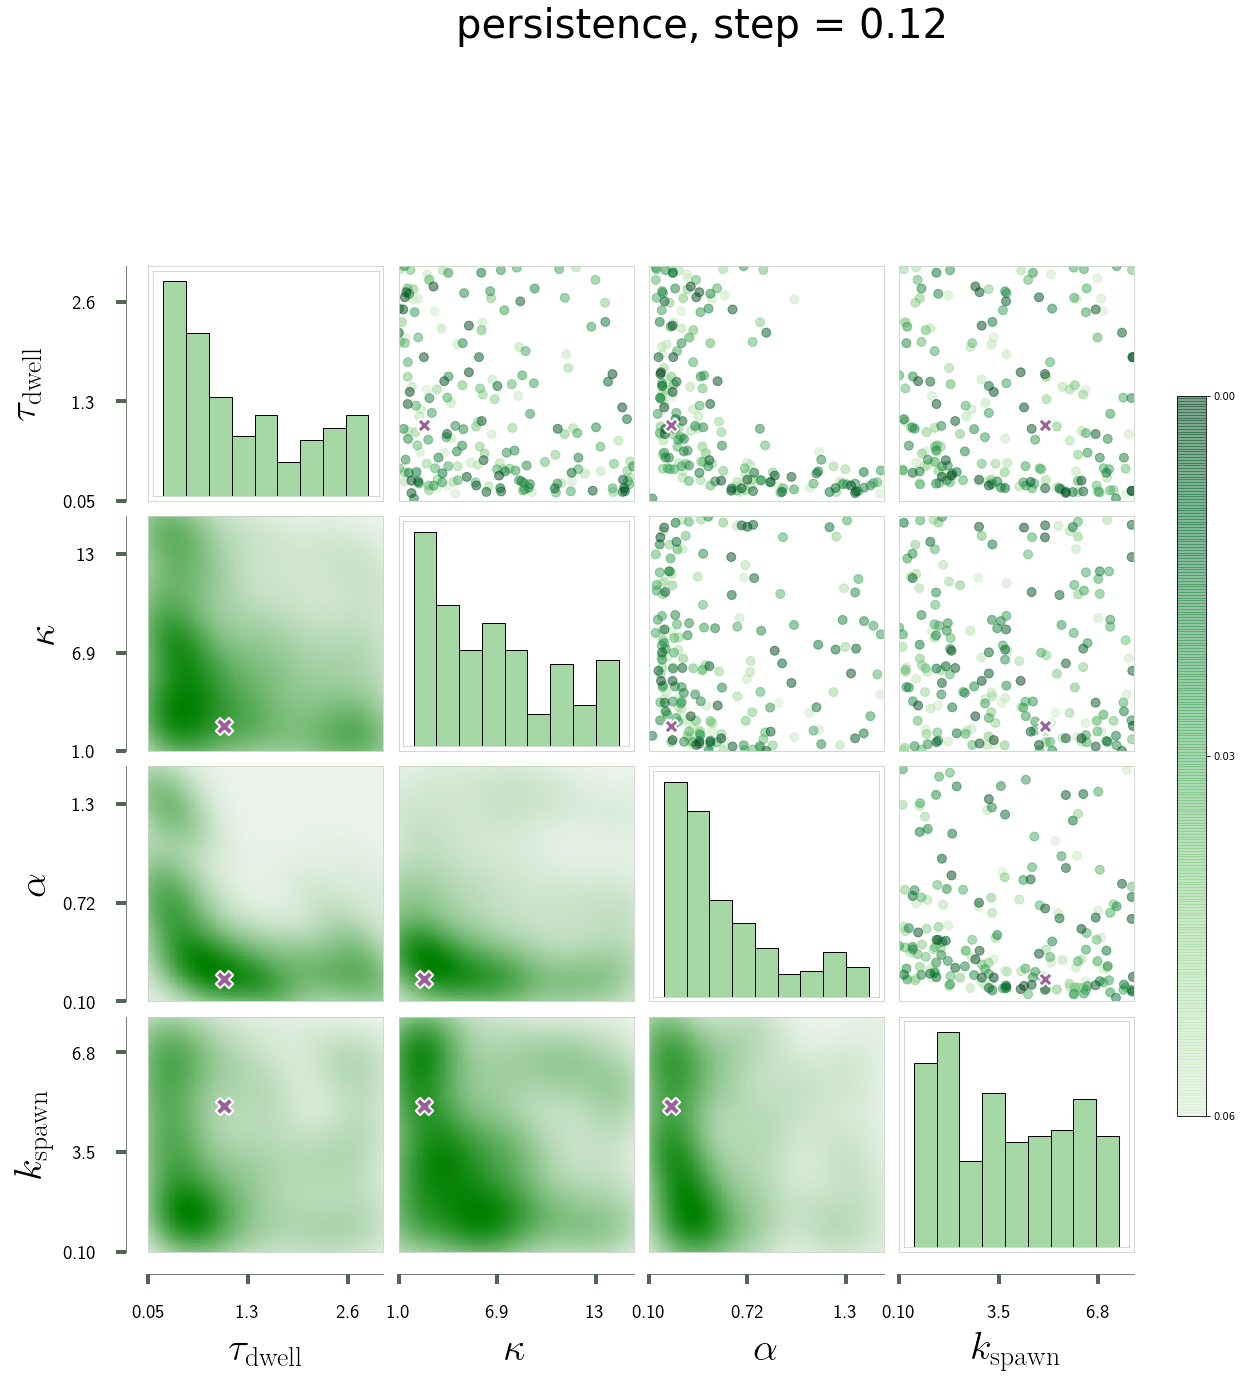

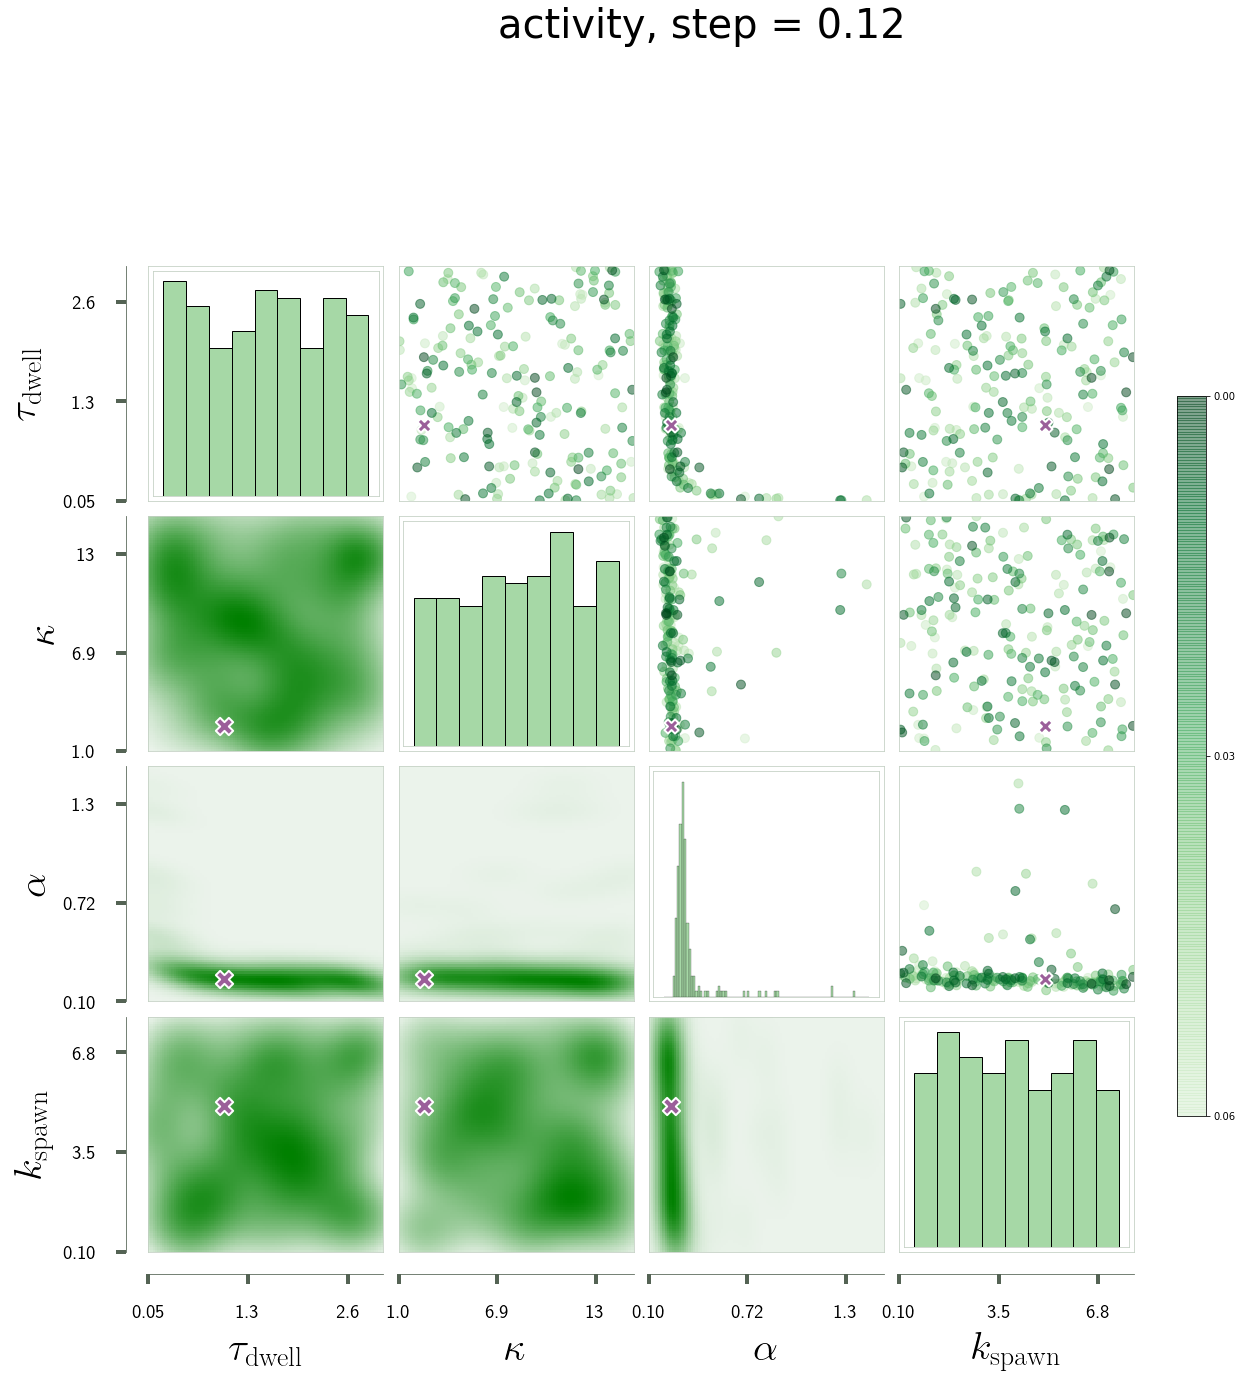

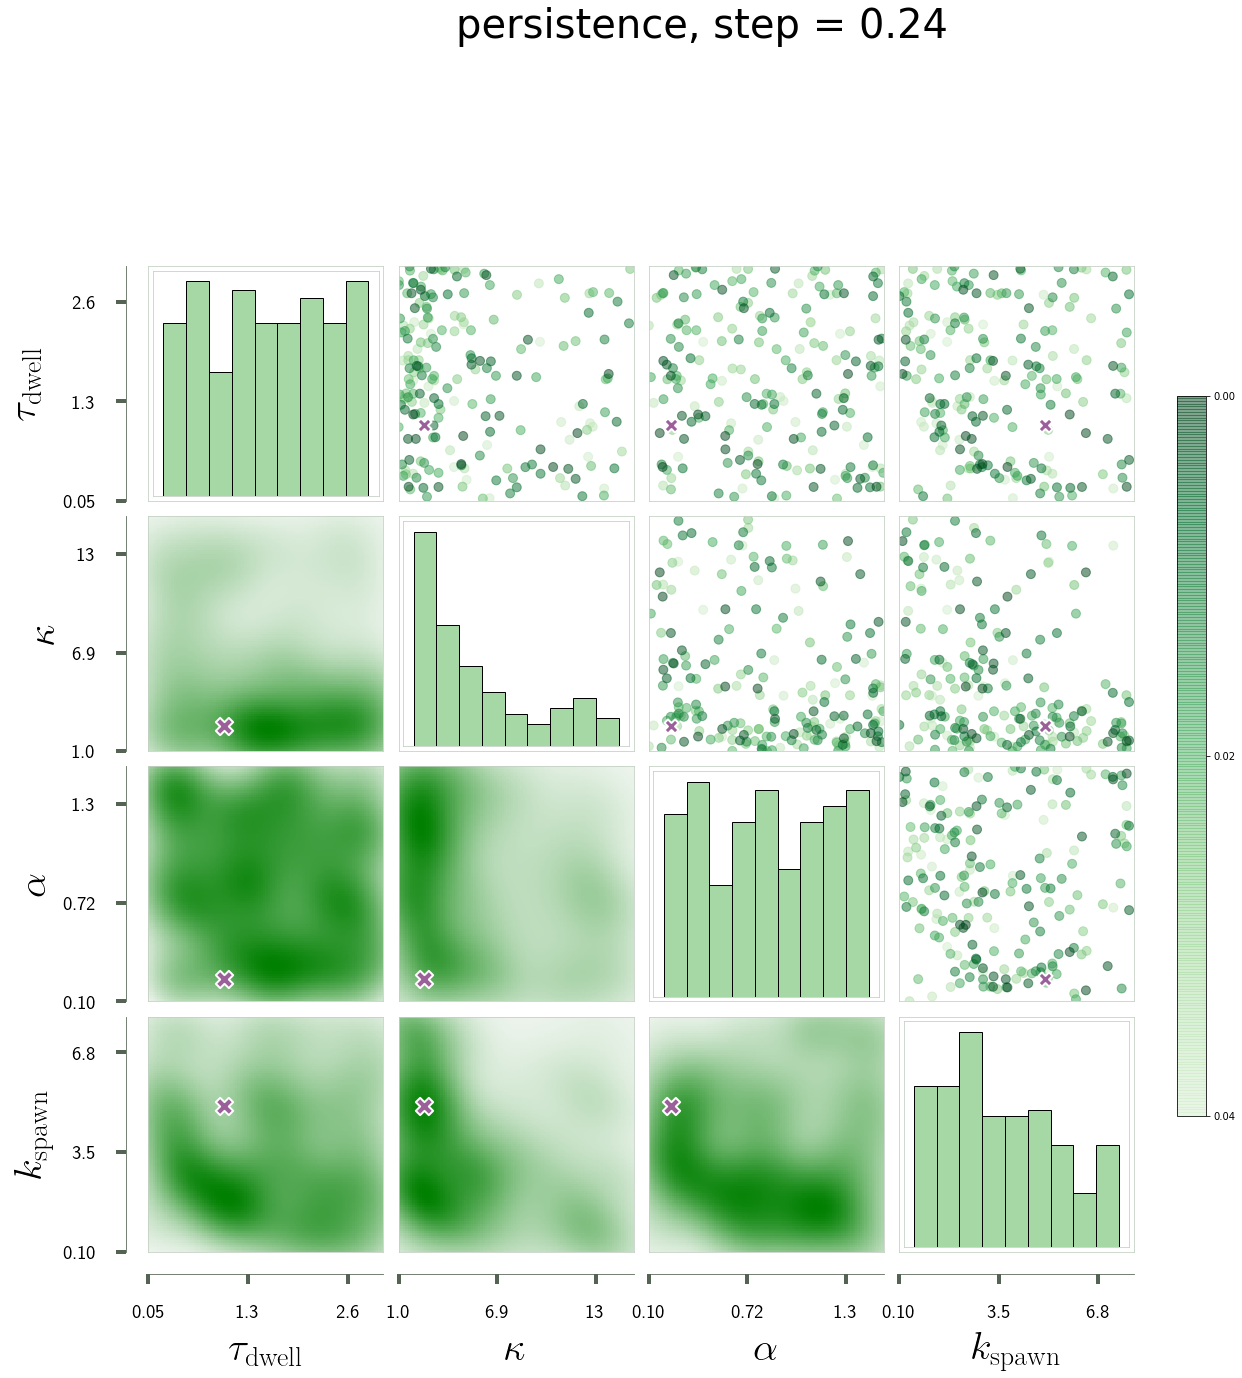

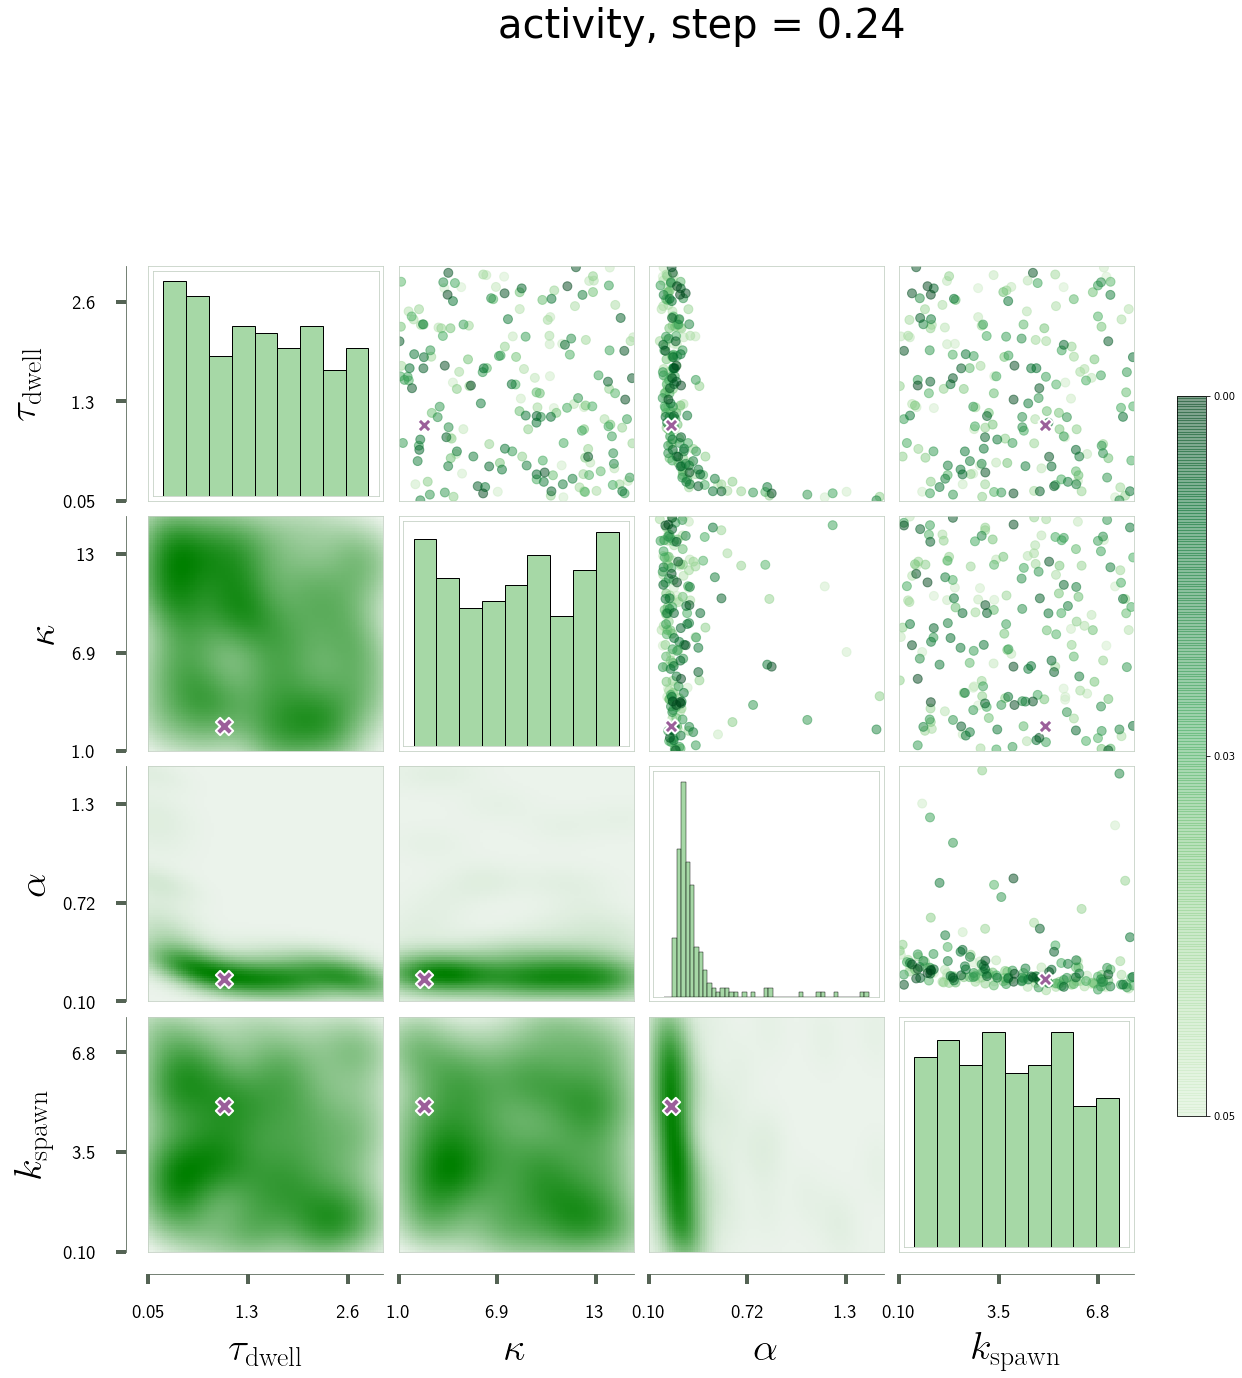

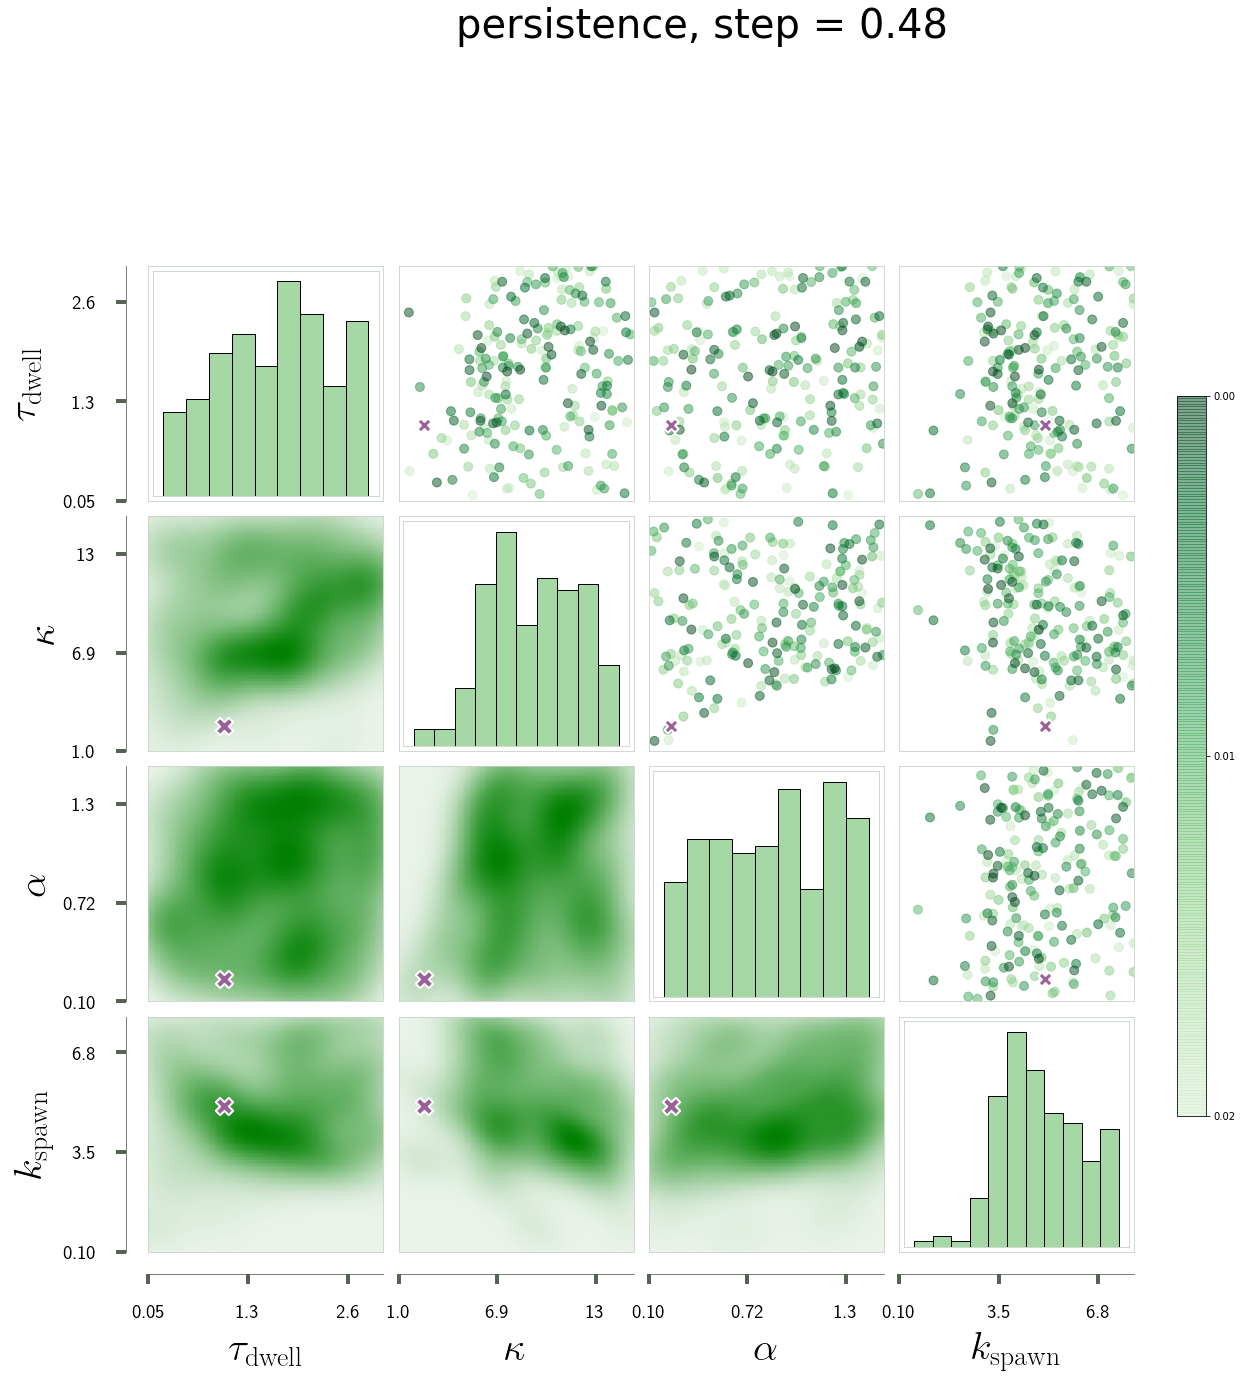

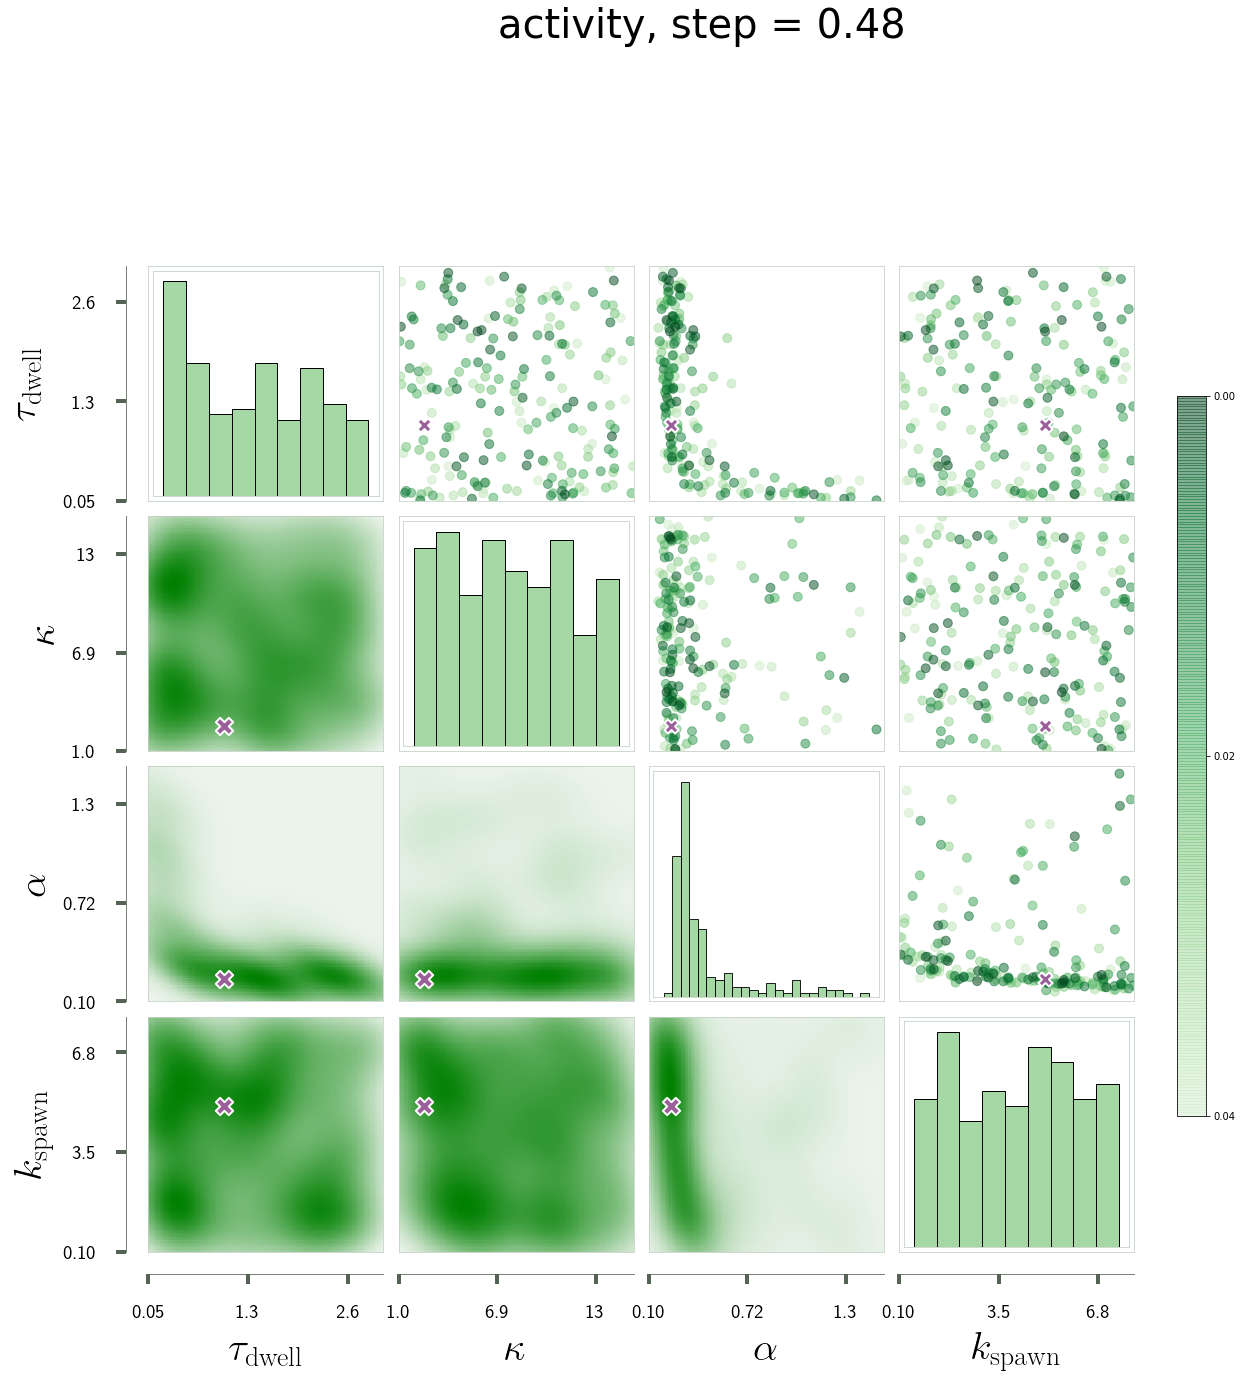

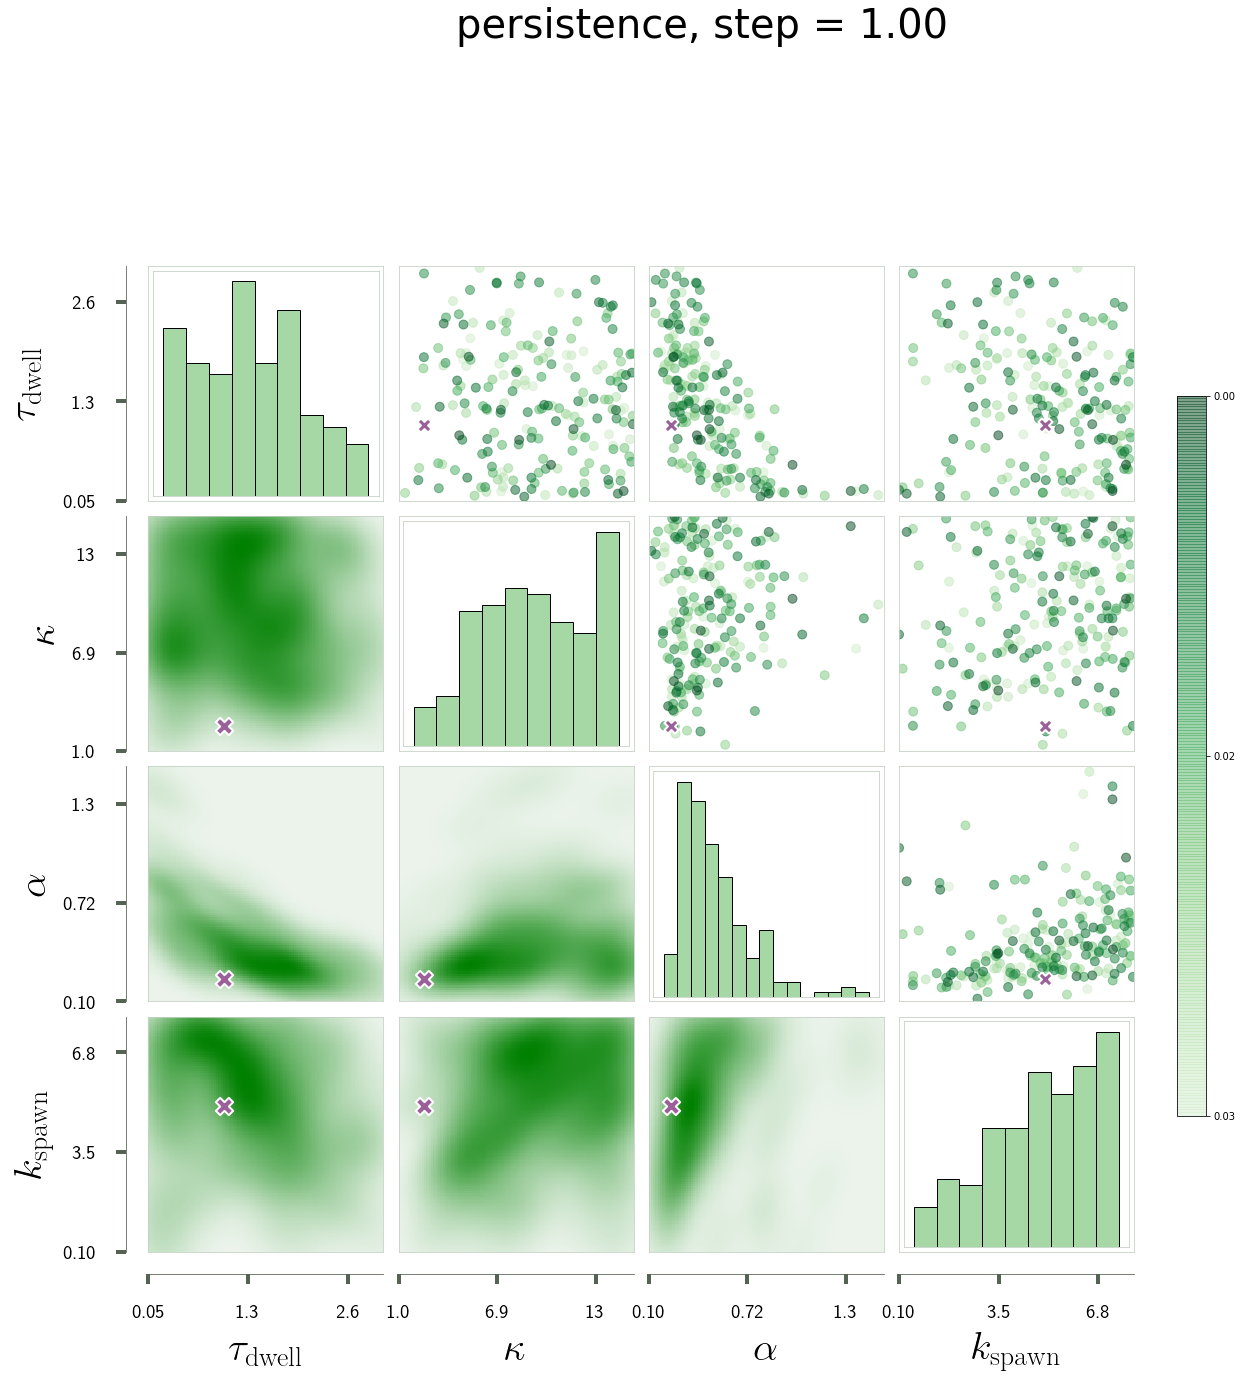

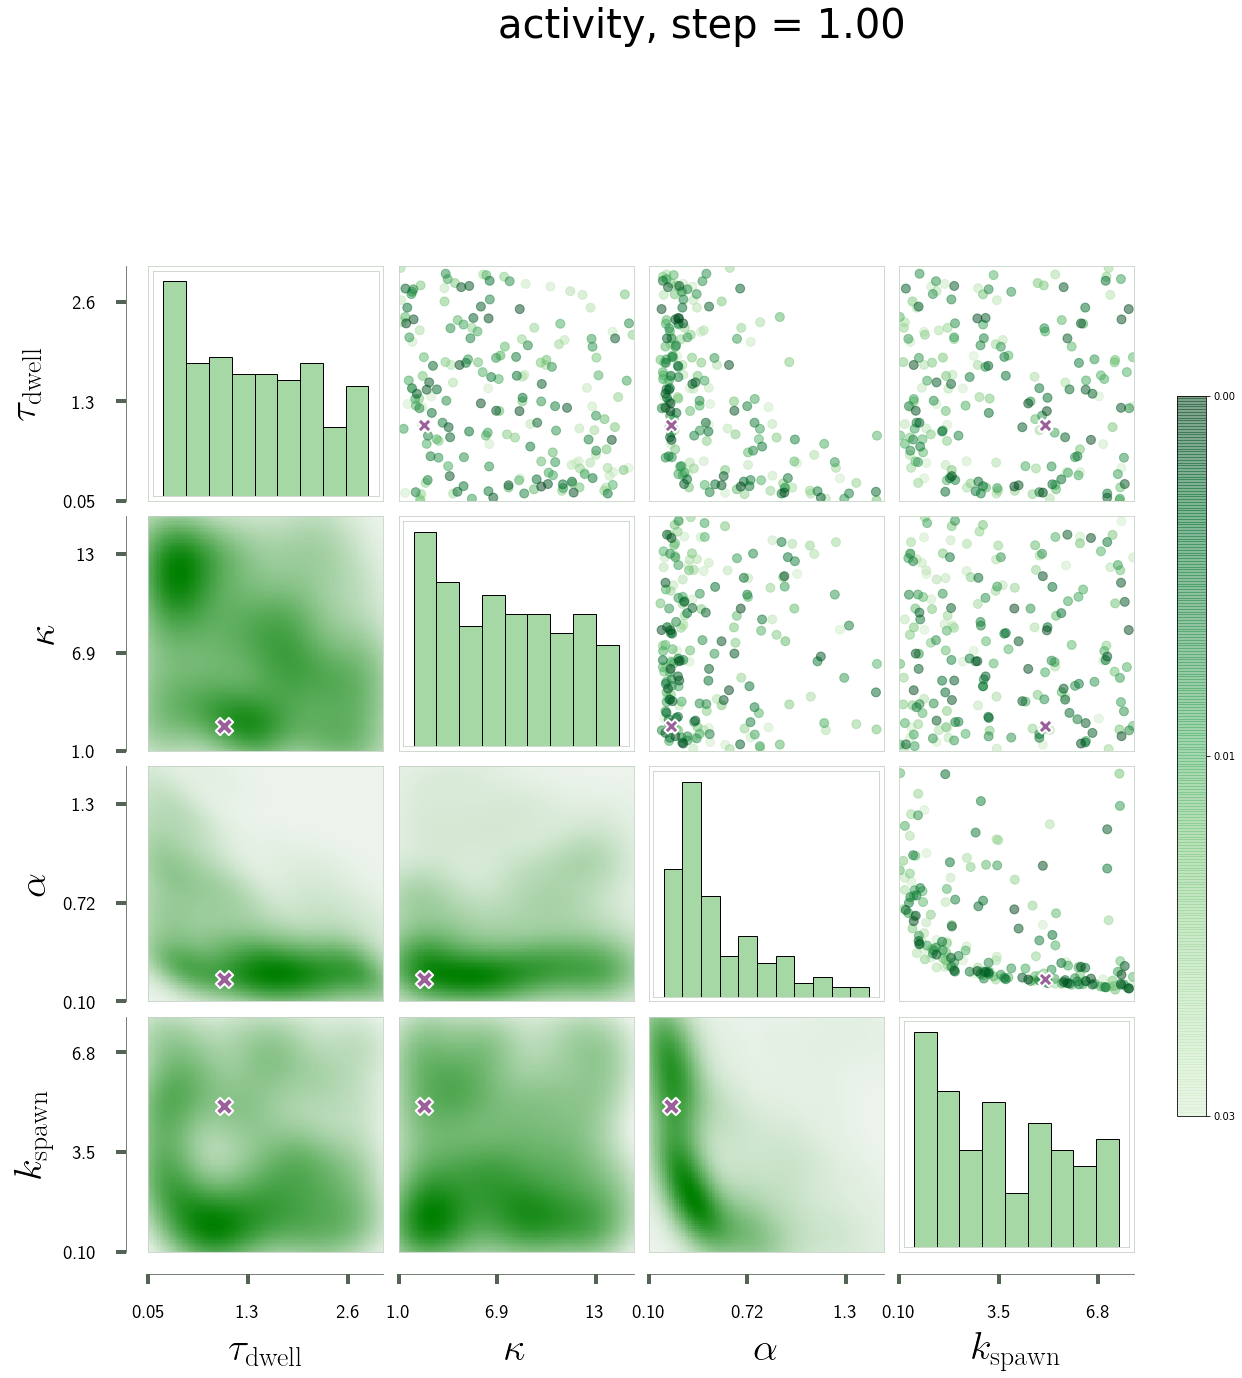

In [8]:
special_stat = ['lvel.mean', 'deviation.var', 'qhat.estimate', 'ahat.estimate']
spar = [r'$\langle u \rangle$', r'$Var(\theta_D)$', r'$\hat{q}$', r'$\hat{a}$']
_pretty = dict([(a,b) for a, b in zip(special_stat, spar)])
special = True
# TMP
_objectives = ['qhat.estimate', 'ahat.estimate',
    'double_ltrs.qhat.estimate', 'double_ltrs.ahat.estimate', 
    'quad_ltrs.qhat.estimate', 'quad_ltrs.ahat.estimate', 
    'cell_ltrs.qhat.estimate', 'cell_ltrs.ahat.estimate'
    ]
_titles = [
    'persistence, step = 0.12', 'activity, step = 0.12',
    'persistence, step = 0.24', 'activity, step = 0.24',
    'persistence, step = 0.48', 'activity, step = 0.48',
    'persistence, step = 1.00', 'activity, step = 1.00',
]
# ~TMP
if plotting or special:
    for i, objective in enumerate(_objectives):
        _regdf = statdf[sim4d["problem"]["names"] + [objective]]
        _accepted = abcimplement.rejection_abc(_regdf, [objective], statref, N)
        fig, axes = abcimplement.perfectplot4d(sim4d["problem"], _accepted, simpar=simpar)
        fig.suptitle(_titles[i], fontsize=40)
        if objective in special_stat:
            pass
            plt.savefig('jure/sim_crawling_abc_statistic_{}.png'.format(objective))
            # fig.suptitle(_pretty[objective])
            # pub.save_figure('sim_crawling_abc_statistic_{}'.format(objective), notename, fig, config={"svg":False})


 because we have easy access to this data, we list the mean displacment-per-pilus
 of the accepted samples for approximate bayesian computation using persistence
 and activity statistics ALONE as the ABC statistics but with varying linearisation step sizes.

In [9]:
# FOR JURE
# compute mean per TFP displacement for each set of accepted samples
# _delta = sim4d["data"].get("effective_contract_length.mean")
_delta = sim4d["data"].get("pdisp.mean")
print('pdist.mean (all samples)', np.mean(_delta))
lst = []
for i, objective in enumerate(_objectives):
    _regdf = statdf[sim4d["problem"]["names"] + [objective]]
    _accepted = abcimplement.rejection_abc(_regdf, [objective], statref, N)
    acc_delta_l = _delta[_accepted.index]
    lst.append(np.mean(acc_delta_l))

r = [0.12,0.24,0.48,1.0]
a, b = lst[::2], lst[1::2]
df = pd.DataFrame({"step":r, "per TFP displacement (persistence)": a, "per TFP displacement (activity)" : b})
df



pdist.mean (all samples) 0.17053140706361422


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


,step,per TFP displacement (persistence),per TFP displacement (activity)
0,0.12,0.090906,0.064660
1,0.24,0.148788,0.074890
2,0.48,0.184341,0.080228
3,1.00,0.111806,0.109906
